## Importing basic model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Reading csv file

In [3]:
pd.set_option("display.max_columns",None)
features_df = pd.read_csv("features.csv",index_col=0)
features_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [4]:
labels_df = pd.read_csv("labels.csv",index_col=0)
labels_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


## Getting information of dataset

In [5]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [6]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


## Getting description of dataset

In [7]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [8]:
labels_df.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


## Checking duplicate value in dataset

In [9]:
features_df.duplicated().sum()

0

## Checking the nan value

In [10]:
features_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [11]:
labels_df.isna().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

## Checking the nan value in percentage

In [12]:
features_df.isna().sum()/features_df.shape[0] * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

## Getting the numerical dtype value columns from dataset

In [13]:
num_data = features_df.select_dtypes(exclude="object")
num_data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0


## Countplot for numerical dtype data


                                             Statistical Analysis of Numerical type data                                              



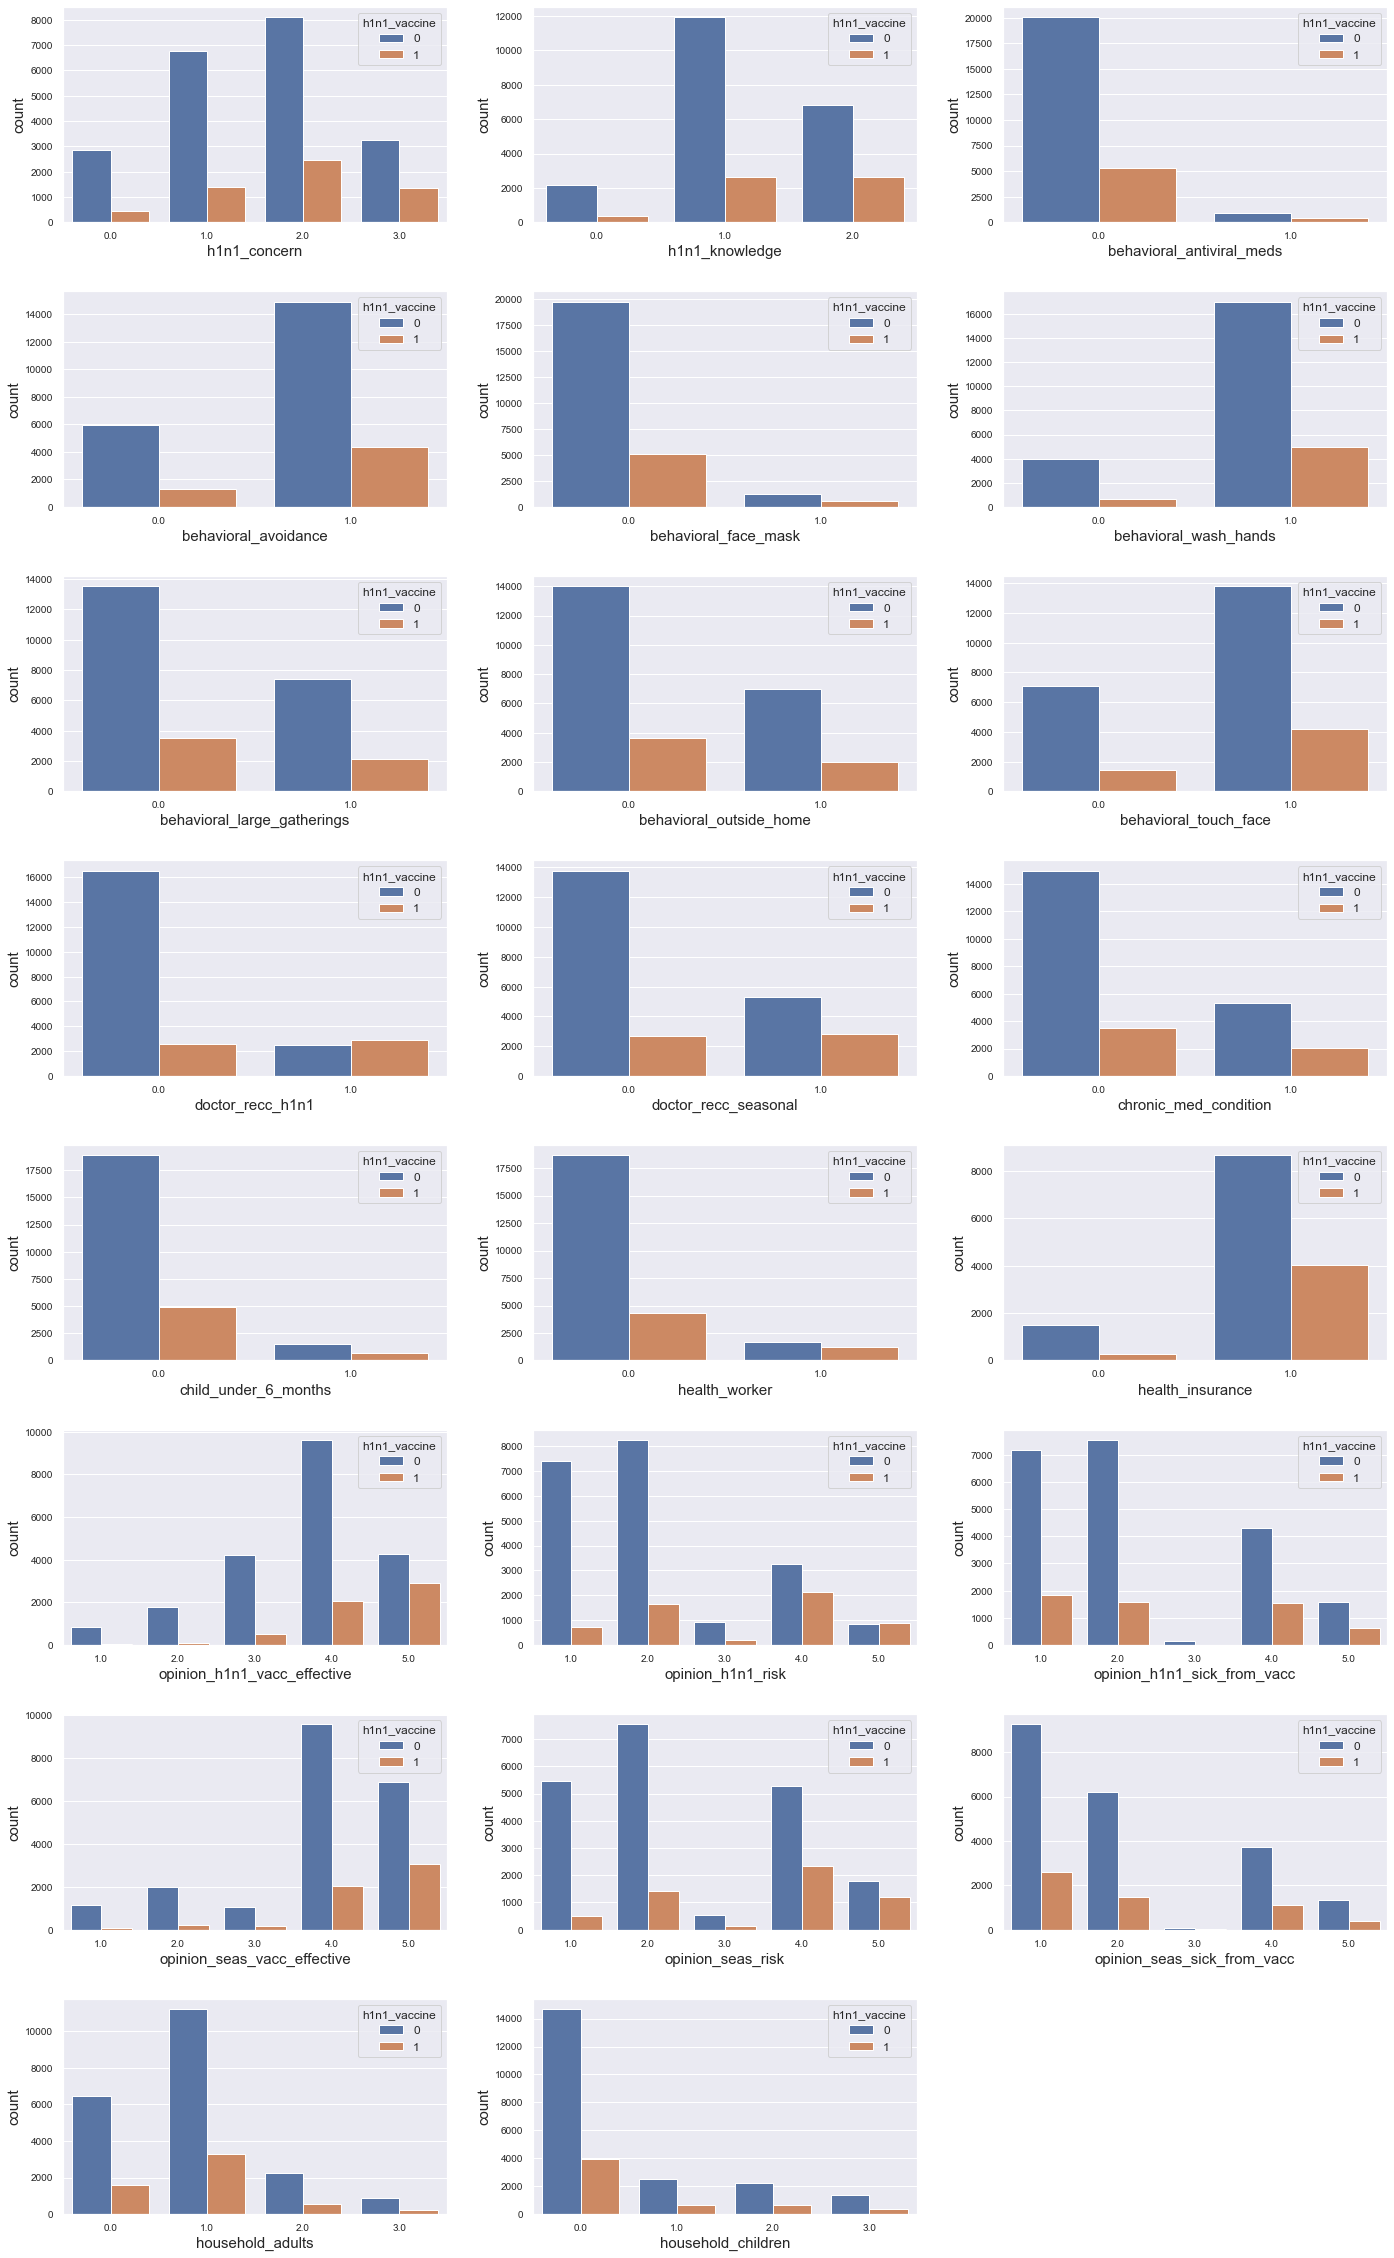

In [14]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":12})
plt.figure(figsize=(20,32))

txt = "Statistical Analysis of Numerical type data"
x = txt.center(134)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(num_data):
    plt.subplot(8,3,index+1)
    sns.countplot(num_data.loc[:,cols],hue=labels_df["h1n1_vaccine"])
plt.tight_layout(pad=2)

## Getting the object dtype value columns from dataset

In [15]:
obj_data = features_df.select_dtypes(include="object")
obj_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN


## Countplot for object dtype data


                                         Statistical Analysis of Categorical type data                                          



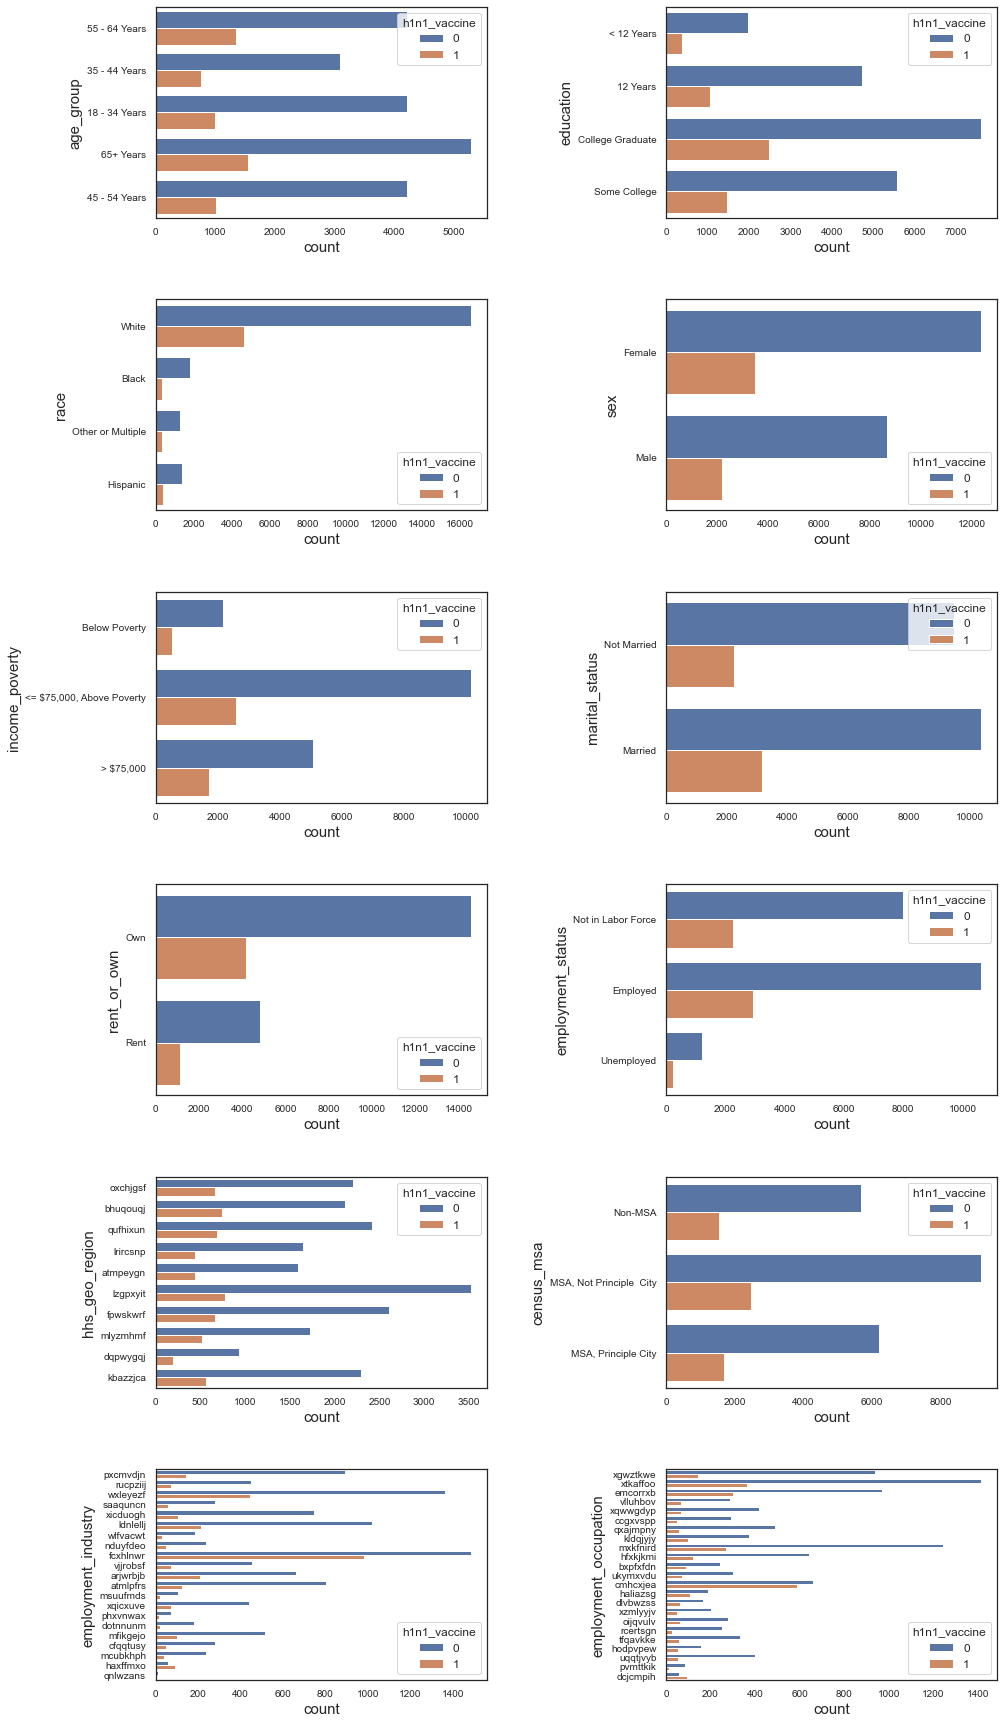

In [16]:
fig = plt.figure(figsize=(15,25))

txt = "Statistical Analysis of Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(obj_data.columns)):
    plt.subplot(6,2,index+1)
    sns.countplot( y =obj_data.iloc[:,index],hue=labels_df["h1n1_vaccine"])
fig.tight_layout(pad=3)

## Checking nan value percentage in numerical type data

In [17]:
num_data.isna().sum()/num_data.shape[0] * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
household_adults                0.932340
household_children              0.932340
dtype: float64

As health_insurance columns have 45.95% missing data. So we can drop it

## Checking nan value percentage in object type data

In [18]:
obj_data.isna().sum()/obj_data.shape[0] * 100

age_group                 0.000000
education                 5.268282
race                      0.000000
sex                       0.000000
income_poverty           16.561201
marital_status            5.272026
rent_or_own               7.645936
employment_status         5.477965
hhs_geo_region            0.000000
census_msa                0.000000
employment_industry      49.912008
employment_occupation    50.436215
dtype: float64

As employmennt_industry & employemnt_occupation columns consists of 50% missing data. So we can drop it.
While income_proverty have 16% missing data so we can fill it.

## Drop the column 

In [19]:
num_data = num_data.drop(["health_insurance"],axis=1)

In [20]:
obj_data = obj_data.drop(["employment_industry","employment_occupation"],axis=1)

## Fill the nan value by using median as data is ordinal

In [21]:
num_data = num_data.fillna(num_data.median())

## After filling nan value , checking any nan value is present or not

In [22]:
num_data.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

## Filling nan value in object type data is slightly different by using mode

## By using SimpleImputer, we can fill object type data using mode

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
obj_data.iloc[:,:] = imputer.fit_transform(obj_data)

## After filling nan value , checking any nan value is present or not

In [24]:
obj_data.isna().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

## Joining numerical type data & object type data into one data frame

In [25]:
final_df = pd.concat([num_data,obj_data],axis=1)
final_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City"


# Feature engineering

### In given dataset, there are multiple columns of behaviour type & Opinion type. So we combine such type of columns into one separate column

In [26]:
convert_dict = {'opinion_h1n1_vacc_effective': int,
                'opinion_h1n1_risk': int,
                'opinion_h1n1_sick_from_vacc': int,
                'opinion_seas_vacc_effective': int,
                'opinion_seas_risk': int,
                'opinion_seas_sick_from_vacc': int,
                'behavioral_antiviral_meds': int,
                'behavioral_avoidance': int,
                'behavioral_face_mask': int,
                'behavioral_wash_hands': int,
                'behavioral_large_gatherings': int,
                'behavioral_outside_home': int,
                'behavioral_touch_face': int,
                } 
final_df = final_df.astype(convert_dict) 

In [27]:
final_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa'],
      dtype='object')

### From all different behaviour columns , we created one behaviour columns

In [28]:
final_df['behavioral'] =  final_df['behavioral_antiviral_meds'].astype(str)+ final_df['behavioral_avoidance'].astype(str)+final_df['behavioral_face_mask'].astype(str)+final_df['behavioral_wash_hands'].astype(str)+final_df['behavioral_large_gatherings'].astype(str) + final_df['behavioral_outside_home'].astype(str)+final_df['behavioral_touch_face'].astype(str)
#pd.set_option("display.max_rows",None)
final_df[['behavioral']].value_counts()

behavioral
0101001       5533
0101111       3940
0101000       2096
0000000       2060
0101101       1453
              ... 
0110010          1
0110100          1
1000010          1
1000100          1
1100100          1
Length: 113, dtype: int64

After combining behaviour columns into one, we get 113 different behaviour categories

### From all different opinion h1n1 columns , we created one unique opinion h1n1 columns

In [29]:
final_df['opinion_h1n1'] = final_df['opinion_h1n1_vacc_effective'].astype(str)+ final_df['opinion_h1n1_risk'].astype(str)+final_df['opinion_h1n1_sick_from_vacc'].astype(str) 

final_df['opinion_h1n1'].value_counts()
print(final_df['opinion_h1n1'].nunique())

118


After combining opinion h1n1 columns into one, we get 118 different opinion h1n1 categories

### From all different opinion seasonal flu columns , we created one unique opinion seasonal flu columns

In [30]:
final_df['opinion_seasonal_flu'] = final_df['opinion_seas_vacc_effective'].astype(str)+final_df['opinion_seas_risk'].astype(str) +final_df['opinion_seas_sick_from_vacc'].astype(str)

final_df['opinion_seasonal_flu'].value_counts()
print(final_df['opinion_seasonal_flu'].nunique())

120


After combining opinion_seasonal_flu columns into one, we get 120 different opinion_seasonal_flu categories

## Dropping the different behaviour columns & opinion columns

In [31]:
final_df = final_df.drop(['behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],axis=1)

## After dropping columns, dataset looklike :

In [32]:
final_df

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,behavioral,opinion_h1n1,opinion_seasonal_flu
respondent_id,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0000011,312,212
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0101011,544,424
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0100000,311,412
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0101100,335,541
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",0101101,332,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0100010,311,522
26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",0101000,422,511
26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0111101,442,542


### As object type data is not understand for the Ml Algorithm, so we have to encode object type data

In [33]:
final_df.select_dtypes(include="object").columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'behavioral', 'opinion_h1n1', 'opinion_seasonal_flu'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'behavioral', 'opinion_h1n1', 'opinion_seasonal_flu']] = final_df[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'behavioral', 'opinion_h1n1', 'opinion_seasonal_flu']].apply(label.fit_transform)

## After encoding, dataset looklike :

In [35]:
final_df

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,behavioral,opinion_h1n1,opinion_seasonal_flu
respondent_id,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,3,0,2,1,0,1,8,2,3,46,24
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3,1,2,1,1,0,1,0,43,112,79
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0,2,3,1,0,1,0,0,9,0,32,45,72
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4,0,3,0,2,1,1,1,5,1,44,59,110
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,3,3,0,0,0,0,0,9,0,45,56,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,3,0,0,1,0,1,9,2,34,45,101
26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,2,3,1,0,1,1,0,6,1,40,76,95
26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,0,0,1,0,0,6,0,61,86,111


## After label encoding, we get same combine column cotegories

In [38]:
final_df["behavioral"].nunique()

113

During feature engineering, we get 113 unique categories then after label encoding we gt same number of unique categories in combined column

In [42]:
final_df["opinion_h1n1"].nunique()

118

During feature engineering, we get 118 unique categories then after label encoding we gt same number of unique categories in combined column

In [43]:
final_df["opinion_seasonal_flu"].nunique()

120

During feature engineering, we get 120 unique categories then after label encoding we gt same number of unique categories in combined column

## Checking Imbalance dataset

In [44]:
labels_df.iloc[:,0].value_counts(normalize=True)*100

0    78.754634
1    21.245366
Name: h1n1_vaccine, dtype: float64

Our ML Algorithm more learn about 0 outcome compare to 1 outcome. It will lead biasing problem. So we have require balance dataset

## Converting Imbalance dataset into balance dataset 

In [45]:
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
oversampling = RandomOverSampler()
final_df_over , labels_df_over = oversampling.fit_sample(final_df,labels_df.iloc[:,0])
final_df_over = pd.DataFrame(final_df_over)
final_df_over.columns = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'household_adults', 'household_children', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'behavioral', 'opinion_h1n1', 'opinion_seasonal_flu']
final_df_over

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,behavioral,opinion_h1n1,opinion_seasonal_flu
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,3,0,2,1,0,1,8,2,3,46,24
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3,1,2,1,1,0,1,0,43,112,79
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0,2,3,1,0,1,0,0,9,0,32,45,72
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4,0,3,0,2,1,1,1,5,1,44,59,110
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,3,3,0,0,0,0,0,9,0,45,56,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4,3,3,0,1,0,1,1,8,1,46,78,89
42062,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3,2,3,0,1,0,0,1,3,0,41,99,110
42063,3.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,3,0,3,0,2,0,0,1,9,2,63,92,118
42064,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2,2,3,0,0,1,0,0,0,2,63,88,89


In [46]:
labels_df_over = pd.DataFrame(labels_df_over)
labels_df_over.columns = ["h1n1_vaccine"]
labels_df_over

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
42061,1
42062,1
42063,1
42064,1


In [47]:
labels_df_over.value_counts(normalize=True)*100

h1n1_vaccine
1               50.0
0               50.0
dtype: float64

Now, we can say that our ml model will learn equally about both responses

## Feature Selection 

In [48]:
#plt.figure(figsize=(15,10))
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(final_df_over,labels_df_over)
feat_importance = pd.DataFrame(importance,final_df_over.columns[0:len(final_df_over.columns)])
feat_importance = feat_importance*100
feat_importance.columns = ["Score"]
feat_importance.nlargest(22,"Score")
#plt.show()

,Score
opinion_h1n1,11.564424
doctor_recc_h1n1,8.927203
opinion_seasonal_flu,6.467734
doctor_recc_seasonal,3.307058
health_worker,1.702198
h1n1_knowledge,1.486727
h1n1_concern,1.146838
behavioral,0.972029
household_adults,0.935243
chronic_med_condition,0.879482


These are the features which impact on the target variable to predict the outcomes

In [49]:
final_df_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42066 entries, 0 to 42065
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   h1n1_concern           42066 non-null  float64
 1   h1n1_knowledge         42066 non-null  float64
 2   doctor_recc_h1n1       42066 non-null  float64
 3   doctor_recc_seasonal   42066 non-null  float64
 4   chronic_med_condition  42066 non-null  float64
 5   child_under_6_months   42066 non-null  float64
 6   health_worker          42066 non-null  float64
 7   household_adults       42066 non-null  float64
 8   household_children     42066 non-null  float64
 9   age_group              42066 non-null  int32  
 10  education              42066 non-null  int32  
 11  race                   42066 non-null  int32  
 12  sex                    42066 non-null  int32  
 13  income_poverty         42066 non-null  int32  
 14  marital_status         42066 non-null  int32  
 15  re

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(final_df_over,labels_df_over)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(final_df_over.columns)
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']
t=[]
for i in featurescores.nlargest(22,"Scores").feature_names:
  t.append(i)
t
featurescores.nlargest(22,"Scores")

,feature_names,Scores
20,opinion_h1n1,55977.301637
21,opinion_seasonal_flu,29209.855188
2,doctor_recc_h1n1,5048.592623
19,behavioral,4722.286483
3,doctor_recc_seasonal,1719.031103
6,health_worker,1212.447044
0,h1n1_concern,460.421159
4,chronic_med_condition,350.973013
1,h1n1_knowledge,262.706358
5,child_under_6_months,214.146241


These are another feture selection method to give best features for getting good prediction

## Defining Features & target for ml algorithm

In [51]:
x = final_df_over.iloc[:,:] #features
y = labels_df_over #target

## Splitting the dataset for trainning & testing purpose

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.30)

## Using ML Algorithm

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14748
0               14698
dtype: int64

## Evaluation of Machine learning model

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))


Accuracy score : 93.26 %

Log loss : 2.33 %

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      6335
           1       0.90      0.97      0.93      6285

    accuracy                           0.93     12620
   macro avg       0.93      0.93      0.93     12620
weighted avg       0.93      0.93      0.93     12620



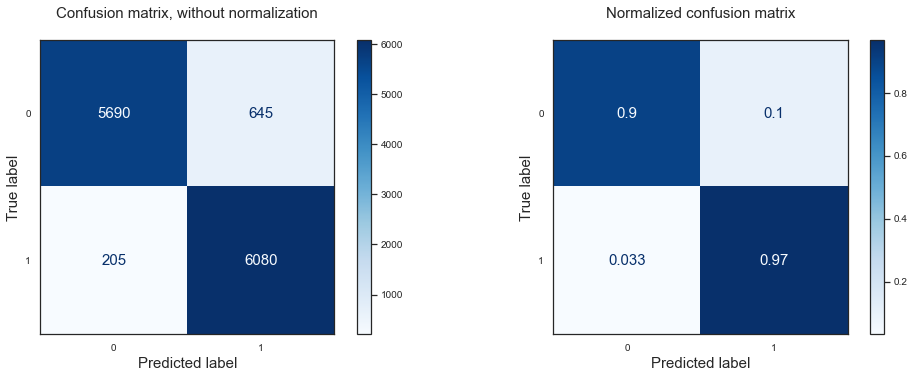

In [45]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

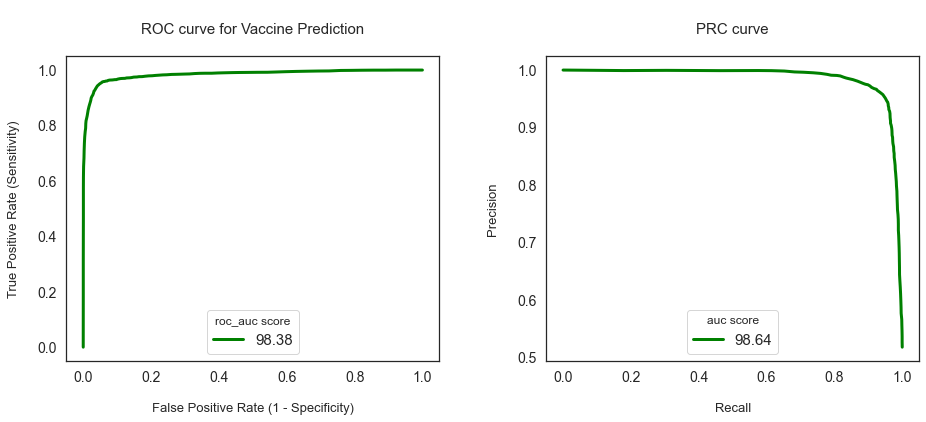

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'w','axes.edgecolor':"0.15"})
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict = rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict)*100,2)],loc=8,fontsize=15,title="roc_auc score")

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15,title="auc score")
plt.tight_layout(pad=4)
plt.show()



## Hyperparameter Tuning

In [95]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000,),
        'max_depth': int(trial.suggest_float('max_depth', 10, 100,)),
        'min_samples_split': trial.suggest_int('min_sample_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features',["auto", "sqrt", "log2"]),
        'bootstrap':trial.suggest_categorical('bootstrap',[True,False]),
        'random_state': trial.suggest_int('random_state',0,100)
        #'scale_pos_weight': 0.48,
       }
        
    clf = RandomForestClassifier(**params)
    auccuracies = []
    X_train_k = x_train.values
    y_train_k = y_train.values
    kf = KFold(n_splits=3,random_state=2000,shuffle=True)
    for train_idx, valid_idx in kf.split(X_train_k,y_train_k):
        train_data = X_train_k[train_idx, :], y_train_k[train_idx]
        valid_data = X_train_k[valid_idx, :], y_train_k[valid_idx]
        
        clf.fit(X_train_k[train_idx, :], y_train_k[train_idx])
        pred = clf.predict(X_train_k[valid_idx, :])
        accuracy = accuracy_score(y_train_k[valid_idx],pred)
        auccuracies.append(accuracy)
    print(f'Trial done: Accuracy values on folds: {auccuracies}')
    return np.average(auccuracies)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

n_trials = 51

FIT_Rf = True

if FIT_Rf:
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-03-02 11:14:55,710] A new study created in memory with name: no-name-2e9a1347-be78-41d7-8582-c332717598f6
[I 2021-03-02 11:15:48,155] Trial 0 finished with value: 0.7715140448750125 and parameters: {'n_estimators': 1136, 'max_depth': 10.484075290468644, 'min_sample_split': 16, 'min_samples_leaf': 13, 'max_features': 'auto', 'bootstrap': True, 'random_state': 71}. Best is trial 0 with value: 0.7715140448750125.


Trial done: Accuracy values on folds: [0.7689486552567237, 0.7731023942944473, 0.7724910850738665]


[I 2021-03-02 11:18:10,575] Trial 1 finished with value: 0.8637845613836967 and parameters: {'n_estimators': 1630, 'max_depth': 49.45819960261483, 'min_sample_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 70}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.8635900570497147, 0.8624554253693326, 0.8653082017320428]


[I 2021-03-02 11:18:28,905] Trial 2 finished with value: 0.7745025051195001 and parameters: {'n_estimators': 361, 'max_depth': 70.25500685602452, 'min_sample_split': 12, 'min_samples_leaf': 19, 'max_features': 'auto', 'bootstrap': True, 'random_state': 39}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.7737367563162184, 0.7744268976057056, 0.7753438614365766]


[I 2021-03-02 11:18:44,379] Trial 3 finished with value: 0.814779706836735 and parameters: {'n_estimators': 257, 'max_depth': 70.51880175337078, 'min_sample_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 5}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.8115321923390383, 0.8137544574630667, 0.8190524707080998]


[I 2021-03-02 11:21:11,361] Trial 4 finished with value: 0.8412687627935608 and parameters: {'n_estimators': 1807, 'max_depth': 25.65363108725468, 'min_sample_split': 16, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False, 'random_state': 48}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.841279543602282, 0.8383087111563933, 0.8442180336220071]


[I 2021-03-02 11:22:51,370] Trial 5 finished with value: 0.7866943957647337 and parameters: {'n_estimators': 1664, 'max_depth': 10.770065273230799, 'min_sample_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 13}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.783516707416463, 0.7859398879266429, 0.7906265919510953]


[I 2021-03-02 11:24:12,965] Trial 6 finished with value: 0.7750118844922841 and parameters: {'n_estimators': 1614, 'max_depth': 55.5634389777534, 'min_sample_split': 4, 'min_samples_leaf': 18, 'max_features': 'auto', 'bootstrap': True, 'random_state': 65}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.7750611246943765, 0.7743250127356087, 0.775649516046867]


[I 2021-03-02 11:24:40,311] Trial 7 finished with value: 0.7889017455914589 and parameters: {'n_estimators': 395, 'max_depth': 19.478571849326443, 'min_sample_split': 14, 'min_samples_leaf': 18, 'max_features': 'log2', 'bootstrap': False, 'random_state': 77}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.7881010594947025, 0.7895058583800305, 0.7890983188996434]


[I 2021-03-02 11:25:15,487] Trial 8 finished with value: 0.8284996179663354 and parameters: {'n_estimators': 571, 'max_depth': 29.752895067477958, 'min_sample_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 4}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.8287489812550938, 0.8251655629139073, 0.8315843097300051]


[I 2021-03-02 11:25:43,444] Trial 9 finished with value: 0.8001087007215668 and parameters: {'n_estimators': 379, 'max_depth': 55.827587438892145, 'min_sample_split': 9, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 2}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.7993072534637327, 0.7988792664289353, 0.8021395822720326]


[I 2021-03-02 11:27:24,299] Trial 10 finished with value: 0.8190925181602653 and parameters: {'n_estimators': 1292, 'max_depth': 96.06423322677603, 'min_sample_split': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 100}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.8208027709861451, 0.8147733061640346, 0.8217014773306164]


[I 2021-03-02 11:29:58,410] Trial 11 finished with value: 0.8475174316266303 and parameters: {'n_estimators': 1865, 'max_depth': 34.6449038283704, 'min_sample_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 40}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.8492257538712307, 0.8435048395313296, 0.8498217014773306]


[I 2021-03-02 11:32:41,931] Trial 12 finished with value: 0.8517964681572415 and parameters: {'n_estimators': 1971, 'max_depth': 39.50034369361582, 'min_sample_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 28}. Best is trial 1 with value: 0.8637845613836967.


Trial done: Accuracy values on folds: [0.8529951100244498, 0.847682119205298, 0.8547121752419765]


[I 2021-03-02 11:34:52,919] Trial 13 finished with value: 0.8985940905114629 and parameters: {'n_estimators': 1415, 'max_depth': 44.833901287337774, 'min_sample_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 23}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8970048899755502, 0.8996434029546613, 0.8991339786041773]


[I 2021-03-02 11:36:40,575] Trial 14 finished with value: 0.8186510758735049 and parameters: {'n_estimators': 1383, 'max_depth': 43.57528426644296, 'min_sample_split': 7, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 90}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8190709046454768, 0.8144676515537442, 0.822414671421294]


[I 2021-03-02 11:37:59,734] Trial 15 finished with value: 0.8781498229331742 and parameters: {'n_estimators': 876, 'max_depth': 67.21853170480733, 'min_sample_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 22}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8784637326813366, 0.8780438104941416, 0.8779419256240448]


[I 2021-03-02 11:39:05,083] Trial 16 finished with value: 0.8323032090689436 and parameters: {'n_estimators': 811, 'max_depth': 72.59356320821385, 'min_sample_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False, 'random_state': 25}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8320089649551752, 0.8294447274579725, 0.8354559347936832]


[I 2021-03-02 11:40:21,811] Trial 17 finished with value: 0.896726239284409 and parameters: {'n_estimators': 820, 'max_depth': 84.81589441429028, 'min_sample_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 22}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8958842705786471, 0.8967906265919511, 0.8975038206826287]


[I 2021-03-02 11:41:45,181] Trial 18 finished with value: 0.890817127868003 and parameters: {'n_estimators': 915, 'max_depth': 96.2717545346639, 'min_sample_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 15}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8896699266503667, 0.8911869587366276, 0.8915944982170148]


[I 2021-03-02 11:42:32,868] Trial 19 finished with value: 0.80075392312799 and parameters: {'n_estimators': 653, 'max_depth': 86.12809809862244, 'min_sample_split': 4, 'min_samples_leaf': 13, 'max_features': 'log2', 'bootstrap': False, 'random_state': 35}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8007334963325183, 0.7991849210392257, 0.8023433520122262]


[I 2021-03-02 11:44:04,829] Trial 20 finished with value: 0.8324390936204599 and parameters: {'n_estimators': 1147, 'max_depth': 83.07888237943914, 'min_sample_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False, 'random_state': 57}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8308883455582722, 0.8299541518084564, 0.8364747834946511]


[I 2021-03-02 11:45:28,776] Trial 21 finished with value: 0.890647319751175 and parameters: {'n_estimators': 927, 'max_depth': 98.31803525861903, 'min_sample_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 15}. Best is trial 13 with value: 0.8985940905114629.


Trial done: Accuracy values on folds: [0.8896699266503667, 0.890983188996434, 0.8912888436067244]


[I 2021-03-02 11:46:33,335] Trial 22 finished with value: 0.9040616731455314 and parameters: {'n_estimators': 679, 'max_depth': 84.00261657920952, 'min_sample_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 10}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.9040342298288508, 0.9028018339276618, 0.9053489556800816]


[I 2021-03-02 11:47:31,770] Trial 23 finished with value: 0.8775725168538361 and parameters: {'n_estimators': 647, 'max_depth': 83.72587511517155, 'min_sample_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False, 'random_state': 30}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.877241238793806, 0.8776362710137544, 0.8778400407539481]


[I 2021-03-02 11:49:35,052] Trial 24 finished with value: 0.8784215332192145 and parameters: {'n_estimators': 1368, 'max_depth': 64.17362315321046, 'min_sample_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False, 'random_state': 19}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8779543602281988, 0.8792664289353032, 0.8780438104941416]


[I 2021-03-02 11:51:11,439] Trial 25 finished with value: 0.8986959546226213 and parameters: {'n_estimators': 1044, 'max_depth': 76.9748545273399, 'min_sample_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 9}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8976161369193154, 0.8987264391237901, 0.899745287824758]


[I 2021-03-02 11:52:44,042] Trial 26 finished with value: 0.8505059818265183 and parameters: {'n_estimators': 1094, 'max_depth': 49.190215291011064, 'min_sample_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False, 'random_state': 8}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8513651181744091, 0.8469689251146205, 0.8531839021905248]


[I 2021-03-02 11:54:41,680] Trial 27 finished with value: 0.8866739828085543 and parameters: {'n_estimators': 1303, 'max_depth': 78.33811181873965, 'min_sample_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 0}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8845762021189894, 0.887111563932756, 0.8883341823739175]


[I 2021-03-02 11:54:49,971] Trial 28 finished with value: 0.7917883832426652 and parameters: {'n_estimators': 115, 'max_depth': 60.53757157163514, 'min_sample_split': 6, 'min_samples_leaf': 16, 'max_features': 'auto', 'bootstrap': False, 'random_state': 10}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.7910554197229014, 0.7918492103922568, 0.7924605196128375]


[I 2021-03-02 11:55:57,747] Trial 29 finished with value: 0.7951844002666554 and parameters: {'n_estimators': 1197, 'max_depth': 90.9254001888161, 'min_sample_split': 8, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True, 'random_state': 0}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.7953341483292583, 0.7947019867549668, 0.7955170657157412]


[I 2021-03-02 11:57:49,698] Trial 30 finished with value: 0.8077158171901448 and parameters: {'n_estimators': 1498, 'max_depth': 75.99281352798774, 'min_sample_split': 7, 'min_samples_leaf': 11, 'max_features': 'auto', 'bootstrap': False, 'random_state': 32}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8077628361858191, 0.8069281711665818, 0.8084564442180336]


[I 2021-03-02 11:59:24,628] Trial 31 finished with value: 0.8928547387743618 and parameters: {'n_estimators': 1022, 'max_depth': 91.33508917690611, 'min_sample_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 21}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8922167889160554, 0.8937340804890473, 0.8926133469179827]


[I 2021-03-02 12:00:35,646] Trial 32 finished with value: 0.8964545393778381 and parameters: {'n_estimators': 755, 'max_depth': 78.72587143516257, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 45}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8960880195599022, 0.8960774325012736, 0.8971981660723383]


[I 2021-03-02 12:01:19,939] Trial 33 finished with value: 0.8635128926155335 and parameters: {'n_estimators': 511, 'max_depth': 87.86645806749222, 'min_sample_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'random_state': 17}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.862876935615322, 0.8610290371879776, 0.866632705043301]


[I 2021-03-02 12:02:50,873] Trial 34 finished with value: 0.8776743982641099 and parameters: {'n_estimators': 1003, 'max_depth': 59.89590244148502, 'min_sample_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False, 'random_state': 9}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8773431132844336, 0.878349465104432, 0.8773306164034641]


[I 2021-03-02 12:03:52,902] Trial 35 finished with value: 0.8520342202797391 and parameters: {'n_estimators': 736, 'max_depth': 51.31928299050385, 'min_sample_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False, 'random_state': 25}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8523838630806846, 0.8484971981660724, 0.8552215995924605]


[I 2021-03-02 12:04:26,985] Trial 36 finished with value: 0.8700672541169473 and parameters: {'n_estimators': 493, 'max_depth': 73.1543874183049, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True, 'random_state': 41}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8697025264873676, 0.8687722873153336, 0.8717269485481406]


[I 2021-03-02 12:06:10,281] Trial 37 finished with value: 0.8636487183500575 and parameters: {'n_estimators': 1185, 'max_depth': 81.92143261071843, 'min_sample_split': 8, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': False, 'random_state': 11}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8634881825590872, 0.8620478858889455, 0.8654100866021396]


[I 2021-03-02 12:06:29,820] Trial 38 finished with value: 0.8412008084084218 and parameters: {'n_estimators': 237, 'max_depth': 44.51837536579256, 'min_sample_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False, 'random_state': 5}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8421964140179299, 0.8387162506367805, 0.8426897605705552]


[I 2021-03-02 12:08:06,688] Trial 39 finished with value: 0.8403517712841051 and parameters: {'n_estimators': 1542, 'max_depth': 90.97466758393685, 'min_sample_split': 14, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'random_state': 37}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8420945395273024, 0.8364747834946511, 0.8424859908303617]


[I 2021-03-02 12:09:28,450] Trial 40 finished with value: 0.8411669159815179 and parameters: {'n_estimators': 992, 'max_depth': 69.94096098204784, 'min_sample_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False, 'random_state': 25}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.840158924205379, 0.8381049414161997, 0.845236882322975]


[I 2021-03-02 12:10:41,674] Trial 41 finished with value: 0.8966583367966162 and parameters: {'n_estimators': 784, 'max_depth': 79.65193908693551, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 55}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8952730236348818, 0.8971981660723383, 0.8975038206826287]


[I 2021-03-02 12:11:58,058] Trial 42 finished with value: 0.8970318696759377 and parameters: {'n_estimators': 823, 'max_depth': 79.14249101549146, 'min_sample_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 56}. Best is trial 22 with value: 0.9040616731455314.


Trial done: Accuracy values on folds: [0.8965973920130399, 0.8971981660723383, 0.897300050942435]


[I 2021-03-02 12:13:20,203] Trial 43 finished with value: 0.9050465290847259 and parameters: {'n_estimators': 851, 'max_depth': 65.6750742277001, 'min_sample_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 63}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.9049511002444988, 0.9040244523688232, 0.9061640346408558]


[I 2021-03-02 12:14:25,512] Trial 44 finished with value: 0.9042315054811209 and parameters: {'n_estimators': 662, 'max_depth': 64.63029838507813, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 66}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.903321108394458, 0.9026999490575649, 0.9066734589913398]


[I 2021-03-02 12:15:26,707] Trial 45 finished with value: 0.9012769272840679 and parameters: {'n_estimators': 654, 'max_depth': 63.35794758528543, 'min_sample_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 72}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.9008761206193969, 0.9001528273051452, 0.9028018339276618]


[I 2021-03-02 12:16:25,942] Trial 46 finished with value: 0.8775725618315362 and parameters: {'n_estimators': 656, 'max_depth': 64.58279807230102, 'min_sample_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False, 'random_state': 75}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.8759168704156479, 0.8795720835455935, 0.8772287315333673]


[I 2021-03-02 12:17:06,792] Trial 47 finished with value: 0.8634789240725218 and parameters: {'n_estimators': 470, 'max_depth': 58.68721567270926, 'min_sample_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'random_state': 65}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.863080684596577, 0.8613346917982679, 0.8660213958227203]


[I 2021-03-02 12:17:46,567] Trial 48 finished with value: 0.7859811601561791 and parameters: {'n_estimators': 574, 'max_depth': 66.59338935331479, 'min_sample_split': 2, 'min_samples_leaf': 20, 'max_features': 'auto', 'bootstrap': False, 'random_state': 85}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.7847392013039934, 0.7859398879266429, 0.7872643912379012]


[I 2021-03-02 12:18:28,589] Trial 49 finished with value: 0.8833118063141218 and parameters: {'n_estimators': 590, 'max_depth': 72.8047078395515, 'min_sample_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 67}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.8838630806845966, 0.8835455934793683, 0.8825267447784004]


[I 2021-03-02 12:18:49,431] Trial 50 finished with value: 0.8567886814794149 and parameters: {'n_estimators': 249, 'max_depth': 53.23308649605627, 'min_sample_split': 18, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 82}. Best is trial 43 with value: 0.9050465290847259.


Trial done: Accuracy values on folds: [0.8572738386308069, 0.8521650534895568, 0.8609271523178808]
Number of finished trials: 51
Best trial:
  Value: 0.9050465290847259
  Params: 
    n_estimators: 851
    max_depth: 65.6750742277001
    min_sample_split: 4
    min_samples_leaf: 1
    max_features: log2
    bootstrap: False
    random_state: 63


## ML trainning

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators= 851,
    max_depth= 65.6750742277001,
    min_samples_split= 4,
    min_samples_leaf= 1,
    max_features='log2',
    bootstrap= False,
    random_state=63)
rf2.fit(x_train,y_train)
y_predict1 = rf2.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14748
0               14698
dtype: int64

## Evaluation of Machine learning model

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict1)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict1),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict1))


Accuracy score : 94.53 %

Log loss : 1.89 %

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6335
           1       0.93      0.96      0.95      6285

    accuracy                           0.95     12620
   macro avg       0.95      0.95      0.95     12620
weighted avg       0.95      0.95      0.95     12620



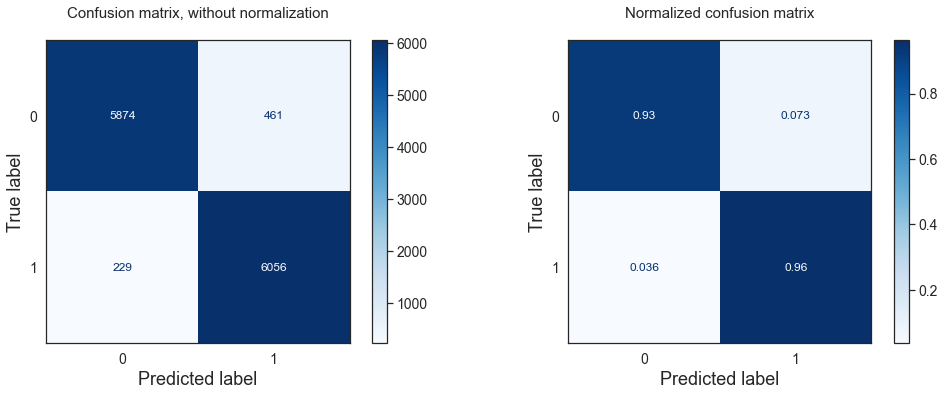

In [49]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(rf2, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(rf2, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

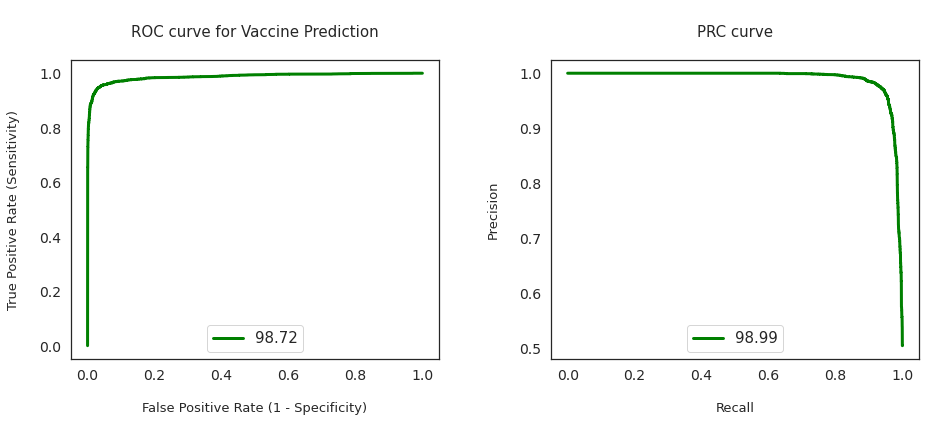

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict1 = rf2.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict1)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict1)*100,2)],loc=8,fontsize=15)



plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict1)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15)
plt.tight_layout(pad=4)
plt.show()



## ML trainning 

In [50]:
from sklearn.ensemble import ExtraTreesClassifier  

ec = ExtraTreesClassifier()
ec.fit(x_train,y_train)
y_predict2 = ec.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14748
0               14698
dtype: int64

## Evaluation of Machine learning model

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict2)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict2),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict2))

Accuracy score : 94.57 %

Log loss : 1.87 %

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.93      0.94      6335
           1       0.93      0.97      0.95      6285

    accuracy                           0.95     12620
   macro avg       0.95      0.95      0.95     12620
weighted avg       0.95      0.95      0.95     12620



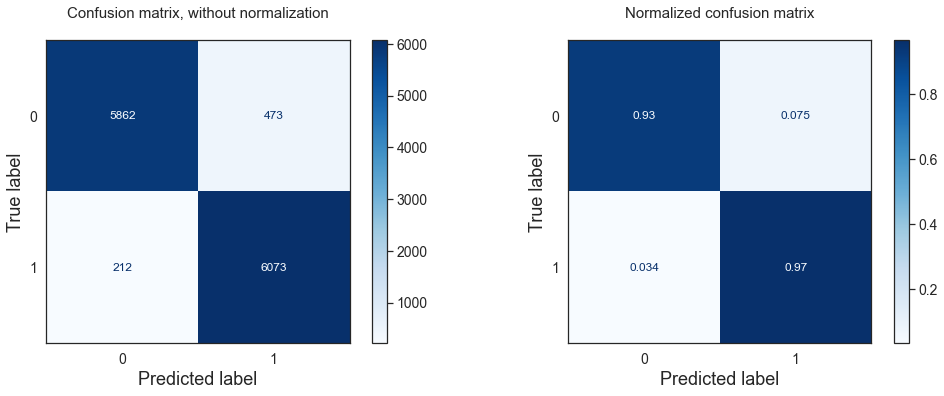

In [52]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(ec, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(ec, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

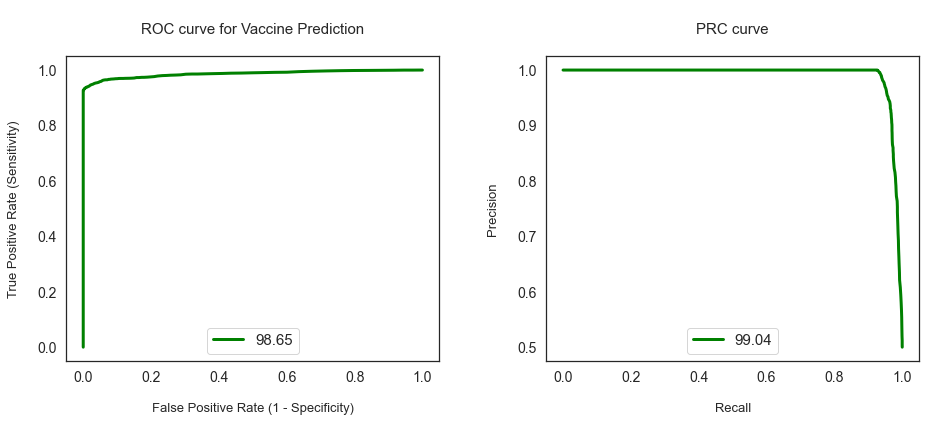

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict2 = ec.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict2)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict2)*100,2)],loc=8,fontsize=15)

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict2)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15)
plt.tight_layout(pad=4)
plt.show()

## Hyperparameter Tunning

In [104]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        #'max_depth': int(trial.suggest_float('max_depth', 10, 100, log=True)),
        'min_samples_split': trial.suggest_int('min_sample_split', 2, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 6,),
        'max_features': trial.suggest_categorical('max_features',["auto", "sqrt", "log2"]),
        'bootstrap':trial.suggest_categorical('bootstrap',[True,False]),
        'random_state': trial.suggest_int('random_state', 0, 100)
        #'scale_pos_weight': 0.48,
       }
        
    clf = ExtraTreesClassifier(**params)
    auccuracies = []
    X_train_k = x_train.values
    y_train_k = y_train.values
    kf = KFold(n_splits=3,random_state=None,shuffle=True)
    for train_idx, valid_idx in kf.split(X_train_k,y_train_k):
        train_data = X_train_k[train_idx, :], y_train_k[train_idx]
        valid_data = X_train_k[valid_idx, :], y_train_k[valid_idx]
        
        clf.fit(X_train_k[train_idx, :], y_train_k[train_idx])
        pred = clf.predict(X_train_k[valid_idx, :])
        accuracy = accuracy_score(y_train_k[valid_idx],pred)
        auccuracies.append(accuracy)
    print(f'Trial done: Accuracy values on folds: {auccuracies}')
    return np.average(auccuracies)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

n_trials = 51

#FIT_XGB = True

#if FIT_XGB:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=n_trials)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2021-03-02 12:21:34,441] A new study created in memory with name: no-name-6cb9fb94-5781-4c8b-96bb-abd16f17b2f6
[I 2021-03-02 12:22:31,697] Trial 0 finished with value: 0.7864905395289631 and parameters: {'n_estimators': 1387, 'min_sample_split': 4, 'min_samples_leaf': 6, 'max_features': 'auto', 'bootstrap': True, 'random_state': 65}. Best is trial 0 with value: 0.7864905395289631.


Trial done: Accuracy values on folds: [0.7860635696821516, 0.7851248089658686, 0.7882832399388691]


[I 2021-03-02 12:23:54,848] Trial 1 finished with value: 0.8301297378298301 and parameters: {'n_estimators': 1450, 'min_sample_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'random_state': 88}. Best is trial 1 with value: 0.8301297378298301.


Trial done: Accuracy values on folds: [0.8298696006519968, 0.8303616912888436, 0.83015792154865]


[I 2021-03-02 12:24:36,527] Trial 2 finished with value: 0.823711233201348 and parameters: {'n_estimators': 908, 'min_sample_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 1}. Best is trial 1 with value: 0.8301297378298301.


Trial done: Accuracy values on folds: [0.8227383863080685, 0.8266938359653592, 0.8217014773306164]


[I 2021-03-02 12:26:16,624] Trial 3 finished with value: 0.8044216504380205 and parameters: {'n_estimators': 1917, 'min_sample_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 86}. Best is trial 1 with value: 0.8301297378298301.


Trial done: Accuracy values on folds: [0.8045028524857376, 0.8007131940906775, 0.8080489047376465]


[I 2021-03-02 12:26:33,814] Trial 4 finished with value: 0.8273449539103129 and parameters: {'n_estimators': 378, 'min_sample_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True, 'random_state': 15}. Best is trial 1 with value: 0.8301297378298301.


Trial done: Accuracy values on folds: [0.8278321108394459, 0.8254712175241976, 0.828731533367295]
Trial done: Accuracy values on folds: [0.8301752241238793, 0.8340295466123281, 0.8337238920020377]


[I 2021-03-02 12:27:42,888] Trial 5 finished with value: 0.8326428875794151 and parameters: {'n_estimators': 1224, 'min_sample_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': False, 'random_state': 86}. Best is trial 5 with value: 0.8326428875794151.
[I 2021-03-02 12:28:51,158] Trial 6 finished with value: 0.8962169602464943 and parameters: {'n_estimators': 1008, 'min_sample_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'random_state': 33}. Best is trial 6 with value: 0.8962169602464943.


Trial done: Accuracy values on folds: [0.8916055419722901, 0.8964849719816608, 0.9005603667855323]


[I 2021-03-02 12:29:47,297] Trial 7 finished with value: 0.8443252189410644 and parameters: {'n_estimators': 1145, 'min_sample_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True, 'random_state': 14}. Best is trial 6 with value: 0.8962169602464943.


Trial done: Accuracy values on folds: [0.8439282803585982, 0.8444218033622007, 0.8446255731023943]


[I 2021-03-02 12:32:03,612] Trial 8 finished with value: 0.9094275750390649 and parameters: {'n_estimators': 1812, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 45}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9050529747351264, 0.9054508405501783, 0.9177789098318899]


[I 2021-03-02 12:32:22,934] Trial 9 finished with value: 0.7953542499013605 and parameters: {'n_estimators': 453, 'min_sample_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 48}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.7941116544417278, 0.7948038716250637, 0.7971472236372898]


[I 2021-03-02 12:34:43,503] Trial 10 finished with value: 0.9056238559230025 and parameters: {'n_estimators': 1912, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 60}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.905562347188264, 0.907080998471727, 0.9042282221090168]
Trial done: Accuracy values on folds: [0.908516707416463, 0.9058583800305655, 0.9006622516556292]


[I 2021-03-02 12:37:08,802] Trial 11 finished with value: 0.9050124463675525 and parameters: {'n_estimators': 1965, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 59}. Best is trial 8 with value: 0.9094275750390649.
[I 2021-03-02 12:39:13,391] Trial 12 finished with value: 0.9052163164426155 and parameters: {'n_estimators': 1716, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 46}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.905562347188264, 0.9012735608762099, 0.9088130412633724]
Trial done: Accuracy values on folds: [0.8814180929095354, 0.8771268466632705, 0.8733571064696892]


[I 2021-03-02 12:41:03,835] Trial 13 finished with value: 0.8773006820141651 and parameters: {'n_estimators': 1665, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 71}. Best is trial 8 with value: 0.9094275750390649.
[I 2021-03-02 12:43:16,964] Trial 14 finished with value: 0.8795421906741714 and parameters: {'n_estimators': 1955, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 33}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8801955990220048, 0.8786551197147223, 0.8797758532857871]


[I 2021-03-02 12:44:10,467] Trial 15 finished with value: 0.906642725382909 and parameters: {'n_estimators': 725, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 36}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9049511002444988, 0.9089149261334691, 0.906062149770759]


[I 2021-03-02 12:44:58,140] Trial 16 finished with value: 0.8788292872086328 and parameters: {'n_estimators': 715, 'min_sample_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 35}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.871638141809291, 0.8834437086092716, 0.8814060112073357]


[I 2021-03-02 12:45:09,957] Trial 17 finished with value: 0.904639003443631 and parameters: {'n_estimators': 159, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 18}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9045436022819886, 0.9066734589913398, 0.9026999490575649]


[I 2021-03-02 12:46:13,901] Trial 18 finished with value: 0.852475807879069 and parameters: {'n_estimators': 723, 'min_sample_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 41}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8498370008149959, 0.8562404482934284, 0.8513499745287825]


[I 2021-03-02 12:47:39,540] Trial 19 finished with value: 0.8748217879729077 and parameters: {'n_estimators': 745, 'min_sample_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 25}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8724531377343113, 0.8752929190015283, 0.8767193071828834]


[I 2021-03-02 12:48:13,774] Trial 20 finished with value: 0.9057595432646032 and parameters: {'n_estimators': 450, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 75}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9102485737571312, 0.9009679062659195, 0.906062149770759]


[I 2021-03-02 12:48:46,361] Trial 21 finished with value: 0.9045372638861037 and parameters: {'n_estimators': 442, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 73}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9002648736756316, 0.9063678043810495, 0.9069791136016302]


[I 2021-03-02 12:48:58,649] Trial 22 finished with value: 0.9058614834918693 and parameters: {'n_estimators': 167, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 49}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9086185819070904, 0.906062149770759, 0.9029037187977585]


[I 2021-03-02 12:49:06,994] Trial 23 finished with value: 0.8776066134103019 and parameters: {'n_estimators': 126, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'random_state': 53}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8732681336593318, 0.8808965868568518, 0.8786551197147223]


[I 2021-03-02 12:49:21,690] Trial 24 finished with value: 0.9050804734089762 and parameters: {'n_estimators': 197, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 40}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9054604726976365, 0.9018848700967906, 0.9078960774325012]


[I 2021-03-02 12:50:19,851] Trial 25 finished with value: 0.8800857081212982 and parameters: {'n_estimators': 875, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 54}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8763243683781581, 0.8820173204279165, 0.8819154355578197]


[I 2021-03-02 12:50:56,322] Trial 26 finished with value: 0.8520343136949623 and parameters: {'n_estimators': 591, 'min_sample_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False, 'random_state': 26}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8496332518337408, 0.8535914416709118, 0.8528782475802343]


[I 2021-03-02 12:51:16,394] Trial 27 finished with value: 0.9072877851776474 and parameters: {'n_estimators': 279, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 5}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9111654441727791, 0.9062659195109526, 0.9044319918492104]


[I 2021-03-02 12:51:54,690] Trial 28 finished with value: 0.878591445130735 and parameters: {'n_estimators': 590, 'min_sample_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 0}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8748981255093724, 0.8780438104941416, 0.8828323993886907]


[I 2021-03-02 12:52:47,590] Trial 29 finished with value: 0.7856075650000421 and parameters: {'n_estimators': 1292, 'min_sample_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 7}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.7852485737571312, 0.7881813550687723, 0.7833927661742232]


[I 2021-03-02 12:53:04,976] Trial 30 finished with value: 0.8180735552851357 and parameters: {'n_estimators': 323, 'min_sample_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 26}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8241646291768541, 0.8208863983698421, 0.8091696383087111]


[I 2021-03-02 12:53:28,433] Trial 31 finished with value: 0.9059634237191355 and parameters: {'n_estimators': 326, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 65}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9069885900570497, 0.9040244523688232, 0.9068772287315333]


[I 2021-03-02 12:53:49,293] Trial 32 finished with value: 0.9033485932290155 and parameters: {'n_estimators': 284, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 63}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9006723716381418, 0.9024961793173714, 0.9068772287315333]
Trial done: Accuracy values on folds: [0.9094335778321109, 0.8990320937340804, 0.900764136525726]


[I 2021-03-02 12:55:32,736] Trial 33 finished with value: 0.9030766026973058 and parameters: {'n_estimators': 1478, 'min_sample_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 70}. Best is trial 8 with value: 0.9094275750390649.
[I 2021-03-02 12:56:13,980] Trial 34 finished with value: 0.9039258058931305 and parameters: {'n_estimators': 588, 'min_sample_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 79}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9046454767726161, 0.8976057055527255, 0.90952623535405]


[I 2021-03-02 12:57:09,719] Trial 35 finished with value: 0.8765536992912759 and parameters: {'n_estimators': 862, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 57}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8763243683781581, 0.8741721854304636, 0.8791645440652063]


[I 2021-03-02 12:58:11,581] Trial 36 finished with value: 0.8956055160928136 and parameters: {'n_estimators': 1078, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 9}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8955786471067645, 0.8952623535404992, 0.8959755476311768]


[I 2021-03-02 12:58:31,531] Trial 37 finished with value: 0.8511172010916986 and parameters: {'n_estimators': 267, 'min_sample_split': 4, 'min_samples_leaf': 3, 'max_features': 'auto', 'bootstrap': False, 'random_state': 96}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8540138549307253, 0.8426897605705552, 0.8566479877738156]


[I 2021-03-02 12:59:05,206] Trial 38 finished with value: 0.8764520289302102 and parameters: {'n_estimators': 504, 'min_sample_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 67}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8700081499592502, 0.8781456953642384, 0.8812022414671421]


[I 2021-03-02 13:00:17,668] Trial 39 finished with value: 0.9054878744964401 and parameters: {'n_estimators': 965, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'random_state': 43}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9095354523227384, 0.906571574121243, 0.9003565970453388]


[I 2021-03-02 13:00:54,134] Trial 40 finished with value: 0.8059161002590299 and parameters: {'n_estimators': 799, 'min_sample_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 83}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8004278728606357, 0.8124299541518084, 0.804890473764646]


[I 2021-03-02 13:01:02,829] Trial 41 finished with value: 0.9044692126259185 and parameters: {'n_estimators': 117, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 48}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9040342298288508, 0.9068772287315333, 0.9024961793173714]


[I 2021-03-02 13:01:19,309] Trial 42 finished with value: 0.9048428250811709 and parameters: {'n_estimators': 224, 'min_sample_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 37}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9030154849225754, 0.9076923076923077, 0.9038206826286297]


[I 2021-03-02 13:01:44,436] Trial 43 finished with value: 0.9063029603768605 and parameters: {'n_estimators': 349, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'random_state': 51}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9093317033414833, 0.90412633723892, 0.9054508405501783]


[I 2021-03-02 13:02:07,511] Trial 44 finished with value: 0.8809006659882646 and parameters: {'n_estimators': 352, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 64}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8798899755501223, 0.8773306164034641, 0.8854814060112073]


[I 2021-03-02 13:02:44,303] Trial 45 finished with value: 0.9063369254600492 and parameters: {'n_estimators': 511, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'random_state': 54}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9092298288508558, 0.9047376464595007, 0.9050433010697911]


[I 2021-03-02 13:03:31,078] Trial 46 finished with value: 0.9066424831952933 and parameters: {'n_estimators': 653, 'min_sample_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'random_state': 30}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.912082314588427, 0.9083036169128884, 0.8995415180845644]


[I 2021-03-02 13:04:16,619] Trial 47 finished with value: 0.9054201934373246 and parameters: {'n_estimators': 645, 'min_sample_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'random_state': 21}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9024042379788101, 0.9052470708099847, 0.9086092715231788]


[I 2021-03-02 13:04:50,607] Trial 48 finished with value: 0.8797799946940152 and parameters: {'n_estimators': 526, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': False, 'random_state': 30}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8780562347188264, 0.8849719816607233, 0.8763117677024962]


[I 2021-03-02 13:05:37,421] Trial 49 finished with value: 0.9045710628977846 and parameters: {'n_estimators': 661, 'min_sample_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'random_state': 11}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.9050529747351264, 0.8986245542536934, 0.9100356597045339]


[I 2021-03-02 13:06:19,705] Trial 50 finished with value: 0.8555999762240959 and parameters: {'n_estimators': 787, 'min_sample_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True, 'random_state': 32}. Best is trial 8 with value: 0.9094275750390649.


Trial done: Accuracy values on folds: [0.8587000814995925, 0.8513499745287825, 0.8567498726439123]
Number of finished trials: 51
Best trial:
  Value: 0.9094275750390649
  Params: 
    n_estimators: 1812
    min_sample_split: 3
    min_samples_leaf: 1
    max_features: sqrt
    bootstrap: False
    random_state: 45


## After Hyperparameter Tuning Ml trainning

In [54]:
from sklearn.ensemble import ExtraTreesClassifier  

ec1 = ExtraTreesClassifier(
    n_estimators= 1812,
    max_depth= None,
    min_samples_split=3,
    min_samples_leaf= 1,
    max_features= 'sqrt',
    max_leaf_nodes= None,
    bootstrap= False,
    random_state=45)
ec1.fit(x_train,y_train)
y_predict3 = ec1.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14748
0               14698
dtype: int64

## Evaluation of Machine learning model

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict3)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict3),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict3))


Accuracy score : 94.56 %

Log loss : 1.88 %

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6335
           1       0.93      0.97      0.95      6285

    accuracy                           0.95     12620
   macro avg       0.95      0.95      0.95     12620
weighted avg       0.95      0.95      0.95     12620



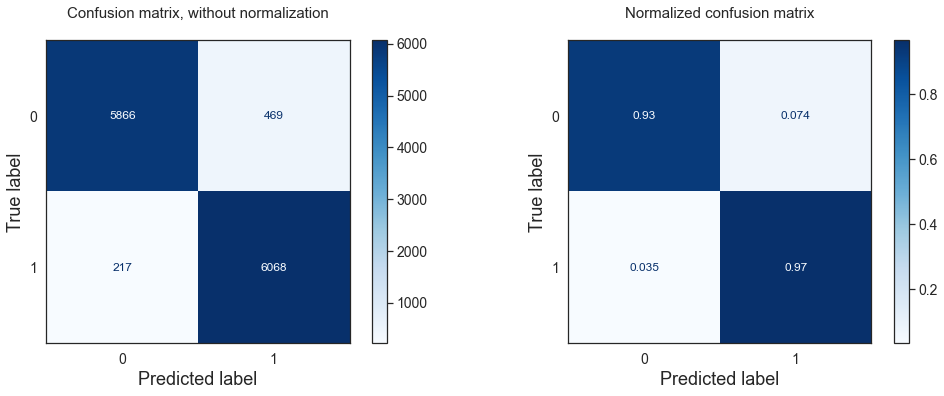

In [56]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(ec1, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(ec1, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

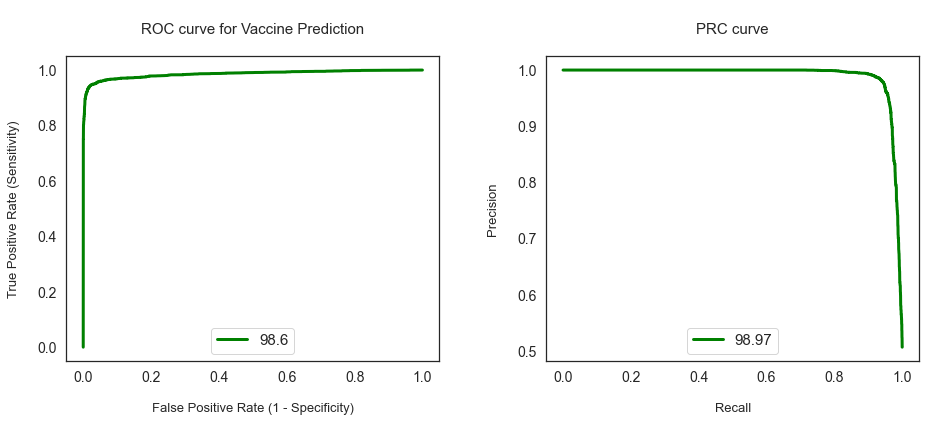

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict3 = ec1.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict3)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict3)*100,2)],loc=8,fontsize=15)

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict3)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15)
plt.tight_layout(pad=4)
plt.show()